In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

def filtro_butterworth(img, D_0, n, filter_type):
    num_rows, num_cols = img.shape
    freq_r = fftfreq(num_rows)
    freq_c = fftfreq(num_cols)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)
    
    butter_filter = np.zeros([num_rows,num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            D = np.sqrt(freq_r[row]**2+freq_c[col]**2)
            if filter_type == "low":
                butter_filter[row,col] = (1/(1+((D/D_0)**(2*n))))
            if filter_type == "high":
                if D == 0:
                    D = 0.0001
                butter_filter[row,col] = (1/(1+((D_0/D)**(2*n))))
            
    return butter_filter

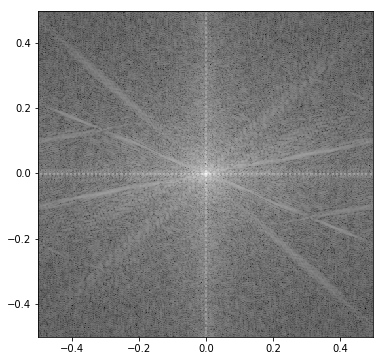

In [2]:
img = plt.imread("cameraman.tiff")

num_rows,num_cols = img.shape

# adiciona valores ao redor da imagem
img_padded = np.pad(img,((0,num_rows),(0,num_cols)),mode='constant', constant_values=0) 

Fimg = fft2(img_padded)
freq_r = fftfreq(2*num_rows)
freq_c = fftfreq(2*num_cols)

Fimg = fftshift(Fimg)
freq_r = fftshift(freq_r)
freq_c = fftshift(freq_c)

Fimg_vis = np.log(np.abs(Fimg))

plt.figure(figsize=[6,6])
plt.pcolormesh(freq_c, freq_r,Fimg_vis, cmap='gray')

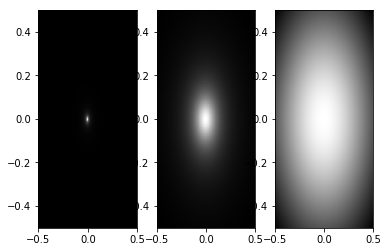

In [3]:
#Low Pass
#teste com diferentes D0 e n = 1
lp_filter1 = filtro_butterworth(img_padded, 0.01, 1, "low")
lp_filter2 = filtro_butterworth(img_padded, 0.1, 1, "low")
lp_filter3 = filtro_butterworth(img_padded, 0.7, 1, "low")

plt.subplot(1,3,1)
plt.pcolormesh(freq_c, freq_r,lp_filter1,cmap='gray')
plt.subplot(1,3,2)
plt.pcolormesh(freq_c, freq_r,lp_filter2,cmap='gray')
plt.subplot(1,3,3)
plt.pcolormesh(freq_c, freq_r,lp_filter3,cmap='gray')

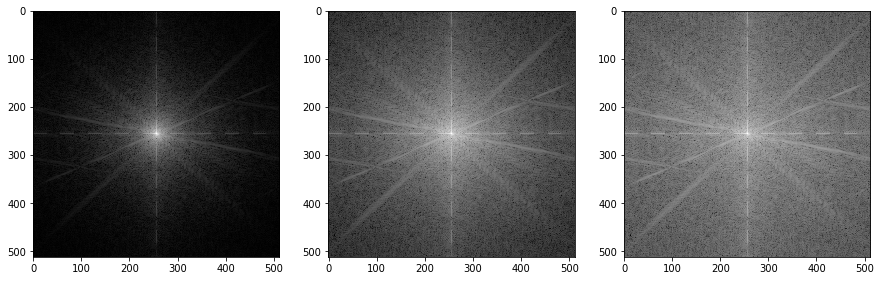

In [4]:
Fimg_filtered1 = Fimg * lp_filter1
Fimg_filtered2 = Fimg * lp_filter2
Fimg_filtered3 = Fimg * lp_filter3

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(Fimg_filtered1)+1),'gray')
plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(Fimg_filtered2)+1),'gray')
plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(Fimg_filtered3)+1),'gray')

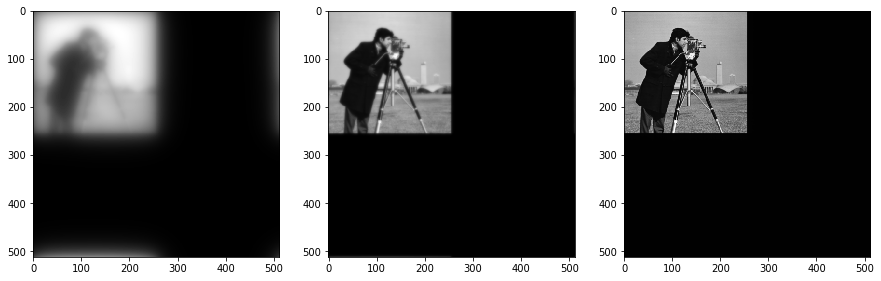

In [5]:
Fimg_filtered1 = fftshift(Fimg_filtered1)
img_filtered1 = np.real(ifft2(Fimg_filtered1))
img_filtered_final1 = img_filtered1[0:num_rows, 0:num_cols]

Fimg_filtered2 = fftshift(Fimg_filtered2)
img_filtered2 = np.real(ifft2(Fimg_filtered2))
img_filtered_final2 = img_filtered2[0:num_rows, 0:num_cols]

Fimg_filtered3 = fftshift(Fimg_filtered3)
img_filtered3 = np.real(ifft2(Fimg_filtered3))
img_filtered_final3 = img_filtered3[0:num_rows, 0:num_cols]

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(img_filtered1,'gray')
plt.subplot(1,3,2)
plt.imshow(img_filtered2,'gray')
plt.subplot(1,3,3)
plt.imshow(img_filtered3,'gray')

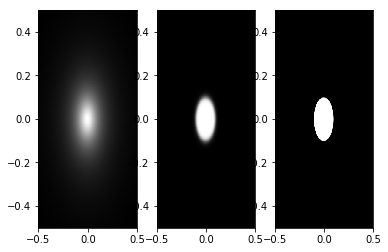

In [6]:
#teste com diferentes D0=0.1 e diferentes n
lp_filter1 = filtro_butterworth(img_padded, 0.1, 1, "low")
lp_filter2 = filtro_butterworth(img_padded, 0.1, 7, "low")
lp_filter3 = filtro_butterworth(img_padded, 0.1, 80, "low")

plt.subplot(1,3,1)
plt.pcolormesh(freq_c, freq_r,lp_filter1,cmap='gray')
plt.subplot(1,3,2)
plt.pcolormesh(freq_c, freq_r,lp_filter2,cmap='gray')
plt.subplot(1,3,3)
plt.pcolormesh(freq_c, freq_r,lp_filter3,cmap='gray')

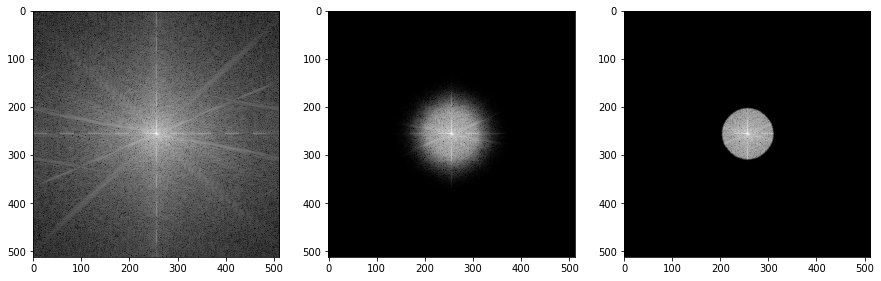

In [7]:
Fimg_filtered1 = Fimg * lp_filter1
Fimg_filtered2 = Fimg * lp_filter2
Fimg_filtered3 = Fimg * lp_filter3

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(Fimg_filtered1)+1),'gray')
plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(Fimg_filtered2)+1),'gray')
plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(Fimg_filtered3)+1),'gray')

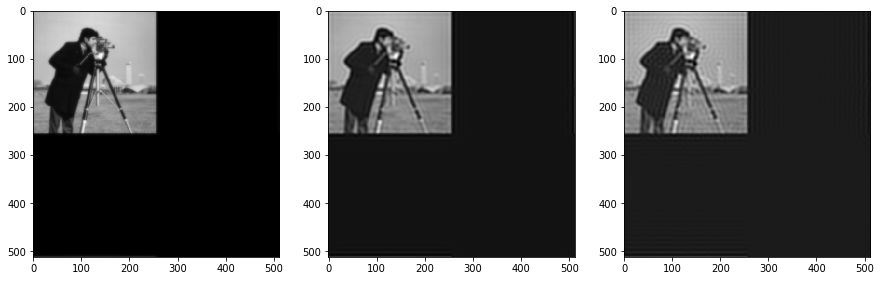

In [8]:
Fimg_filtered1 = fftshift(Fimg_filtered1)
img_filtered1 = np.real(ifft2(Fimg_filtered1))
img_filtered_final1 = img_filtered1[0:num_rows, 0:num_cols]

Fimg_filtered2 = fftshift(Fimg_filtered2)
img_filtered2 = np.real(ifft2(Fimg_filtered2))
img_filtered_final2 = img_filtered2[0:num_rows, 0:num_cols]

Fimg_filtered3 = fftshift(Fimg_filtered3)
img_filtered3 = np.real(ifft2(Fimg_filtered3))
img_filtered_final3 = img_filtered3[0:num_rows, 0:num_cols]

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(img_filtered1,'gray')
plt.subplot(1,3,2)
plt.imshow(img_filtered2,'gray')
plt.subplot(1,3,3)
plt.imshow(img_filtered3,'gray')

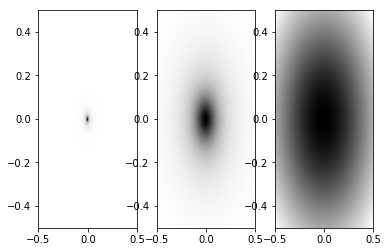

In [9]:
#High Pass
#teste com diferentes D0 e n = 1
lp_filter1 = filtro_butterworth(img_padded, 0.01, 1, "high")
lp_filter2 = filtro_butterworth(img_padded, 0.1, 1, "high")
lp_filter3 = filtro_butterworth(img_padded, 0.7, 1, "high")

plt.subplot(1,3,1)
plt.pcolormesh(freq_c, freq_r,lp_filter1,cmap='gray')
plt.subplot(1,3,2)
plt.pcolormesh(freq_c, freq_r,lp_filter2,cmap='gray')
plt.subplot(1,3,3)
plt.pcolormesh(freq_c, freq_r,lp_filter3,cmap='gray')

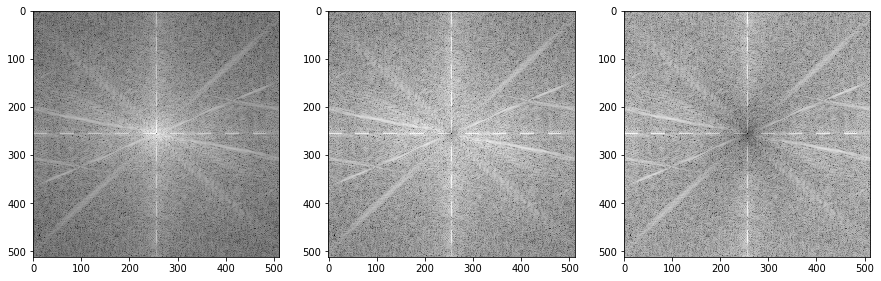

In [10]:
Fimg_filtered1 = Fimg * lp_filter1
Fimg_filtered2 = Fimg * lp_filter2
Fimg_filtered3 = Fimg * lp_filter3

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(Fimg_filtered1)+1),'gray')
plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(Fimg_filtered2)+1),'gray')
plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(Fimg_filtered3)+1),'gray')

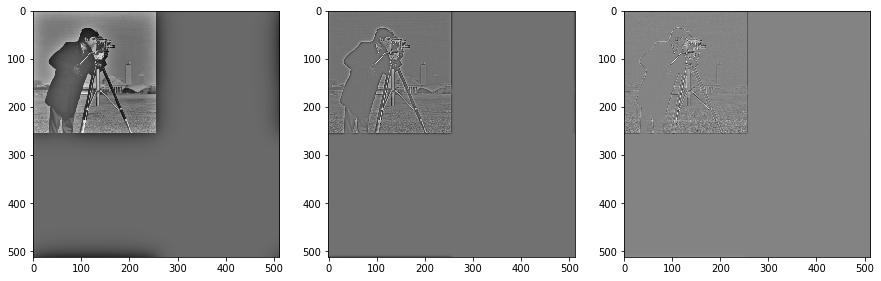

In [11]:
Fimg_filtered1 = fftshift(Fimg_filtered1)
img_filtered1 = np.real(ifft2(Fimg_filtered1))
img_filtered_final1 = img_filtered1[0:num_rows, 0:num_cols]

Fimg_filtered2 = fftshift(Fimg_filtered2)
img_filtered2 = np.real(ifft2(Fimg_filtered2))
img_filtered_final2 = img_filtered2[0:num_rows, 0:num_cols]

Fimg_filtered3 = fftshift(Fimg_filtered3)
img_filtered3 = np.real(ifft2(Fimg_filtered3))
img_filtered_final3 = img_filtered3[0:num_rows, 0:num_cols]

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(img_filtered1,'gray')
plt.subplot(1,3,2)
plt.imshow(img_filtered2,'gray')
plt.subplot(1,3,3)
plt.imshow(img_filtered3,'gray')

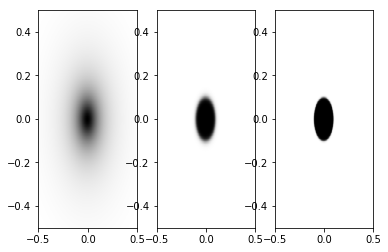

In [12]:
#High Pass
#teste com diferentes D0=0.1 e diferentes n
lp_filter1 = filtro_butterworth(img_padded, 0.1, 1, "high")
lp_filter2 = filtro_butterworth(img_padded, 0.1, 7, "high")
lp_filter3 = filtro_butterworth(img_padded, 0.1, 20, "high")

plt.subplot(1,3,1)
plt.pcolormesh(freq_c, freq_r,lp_filter1,cmap='gray')
plt.subplot(1,3,2)
plt.pcolormesh(freq_c, freq_r,lp_filter2,cmap='gray')
plt.subplot(1,3,3)
plt.pcolormesh(freq_c, freq_r,lp_filter3,cmap='gray')

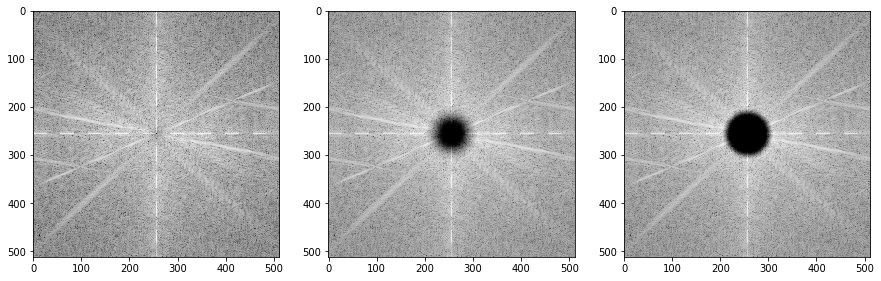

In [13]:
Fimg_filtered1 = Fimg * lp_filter1
Fimg_filtered2 = Fimg * lp_filter2
Fimg_filtered3 = Fimg * lp_filter3

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(Fimg_filtered1)+1),'gray')
plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(Fimg_filtered2)+1),'gray')
plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(Fimg_filtered3)+1),'gray')

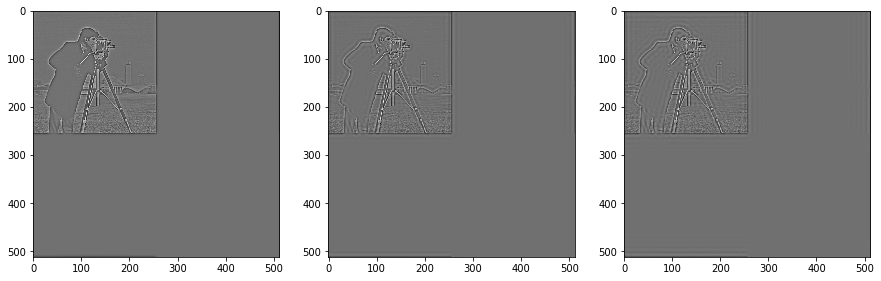

In [14]:
Fimg_filtered1 = fftshift(Fimg_filtered1)
img_filtered1 = np.real(ifft2(Fimg_filtered1))
img_filtered_final1 = img_filtered1[0:num_rows, 0:num_cols]

Fimg_filtered2 = fftshift(Fimg_filtered2)
img_filtered2 = np.real(ifft2(Fimg_filtered2))
img_filtered_final2 = img_filtered2[0:num_rows, 0:num_cols]

Fimg_filtered3 = fftshift(Fimg_filtered3)
img_filtered3 = np.real(ifft2(Fimg_filtered3))
img_filtered_final3 = img_filtered3[0:num_rows, 0:num_cols]

plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(img_filtered1,'gray')
plt.subplot(1,3,2)
plt.imshow(img_filtered2,'gray')
plt.subplot(1,3,3)
plt.imshow(img_filtered3,'gray')